In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
l_min = 1
l_max = 5

n_l = 3  # number of values for l

q_min = 10 * 10 ** 4
q_max = 100 * 10 ** 4

n_q = 3

E_min = 210 * 10 ** 9
E_max = 300 * 10 ** 9
n_E = 3

I_min = 1 * 10 ** (-5)
I_max = 10 * 10 ** (-5)

n_I = 3

# Will make the vectors linearly spaced, but it's not necessary
l_vec = np.linspace(l_min, l_max, n_l)  # in this case, l_vec = [1, 3, 5]
q_vec = np.linspace(q_min, q_max, n_q)
E_vec = np.linspace(E_min, E_max, n_E)
I_vec = np.linspace(I_min, I_max, n_I)

In [3]:
# Compute all possible permutations and arrange them in a matrix (in this case [81,4])

per_list = []
for i in range(len(l_vec)):
    for j in range(len(q_vec)):
        for k in range(len(E_vec)):
            for l in range(len(I_vec)):
                per_list = np.append(per_list, np.array([[l_vec[i], q_vec[j], E_vec[k], I_vec[l]]]))

per_list = per_list.reshape(-1, 4)

# Shuffle the permutations
np.random.shuffle(per_list)

np.save('81_combinations', per_list)  # saved as an .npy file to use later using np.load('81_combinations')

In [4]:
# analytical solution for the beam bending problem

def ana_sol(n, l, q, E, I):
    x_min = 0
    x_max = l
    x = np.linspace(x_min, x_max, n)
    y = np.zeros(len(x))
    c_1 = -(q * l ** 3) / (24 * E * I)
    y = (1 / (E * I)) * (((q * l) / 12) * x ** 3 - (q / 24) * x ** 4) + c_1 * x

    return [x, y]

In [5]:
# Create the fictitious points for each permutation

n = 1000  # number of points for each permutation

x_mat = np.zeros((n, per_list.shape[0]))
y_mat = np.zeros((n, per_list.shape[0]))
for i in range(per_list.shape[0]):
    x_mat[:, i] = ana_sol(n, per_list[i, 0], per_list[i, 1], per_list[i, 2], per_list[i, 3])[0]
    y_mat[:, i] = ana_sol(n, per_list[i, 0], per_list[i, 1], per_list[i, 2], per_list[i, 3])[1]

In [6]:
print(per_list.shape)
print('\n')
print(per_list[0:15])

(81, 4)


[[5.00e+00 5.50e+05 2.55e+11 1.00e-05]
 [5.00e+00 1.00e+06 2.10e+11 5.50e-05]
 [5.00e+00 1.00e+05 3.00e+11 1.00e-05]
 [5.00e+00 1.00e+05 3.00e+11 1.00e-04]
 [5.00e+00 5.50e+05 2.10e+11 1.00e-04]
 [3.00e+00 5.50e+05 2.10e+11 1.00e-05]
 [3.00e+00 5.50e+05 2.55e+11 1.00e-05]
 [1.00e+00 5.50e+05 2.10e+11 5.50e-05]
 [3.00e+00 1.00e+05 2.55e+11 1.00e-04]
 [1.00e+00 1.00e+05 2.55e+11 1.00e-04]
 [3.00e+00 5.50e+05 2.10e+11 1.00e-04]
 [3.00e+00 1.00e+06 2.55e+11 1.00e-04]
 [5.00e+00 5.50e+05 3.00e+11 1.00e-05]
 [3.00e+00 1.00e+06 3.00e+11 5.50e-05]
 [5.00e+00 5.50e+05 2.55e+11 1.00e-04]]


In [7]:
print(x_mat.shape)

(1000, 81)


In [8]:
print(y_mat.shape)

(1000, 81)


In [9]:
print(per_list[80])  # [l, q, E, I]

[1.0e+00 1.0e+06 2.1e+11 5.5e-05]


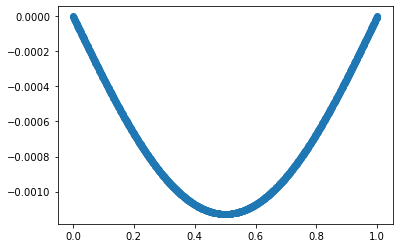

In [10]:
plt.scatter(x_mat[:, 80], y_mat[:, 80])
plt.show()

In [11]:
print(per_list[5])  # [l, q, E, I]

[3.0e+00 5.5e+05 2.1e+11 1.0e-05]


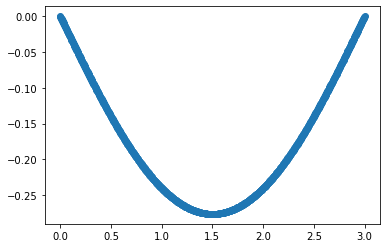

In [12]:
plt.scatter(x_mat[:, 5], y_mat[:, 5])
plt.show()

In [13]:
# Next we will add some noise to the data.

# 90% of this data will be our trainig/validation data and the remaining 10% will be our test data.

# We will need to decide if the matrices x_mat and y_mat are a convenient way to
# store our points (x and y are in seperate matrices)

In [14]:
# Add noise
noise_factor = 0.2
for i in range(y_mat.shape[1]):
    y_mat[:, i] = y_mat[:, i] + noise_factor * (np.random.random(len(y_mat[:, i])) - 0.5) * (np.max(y_mat[:, i]) - np.min(y_mat[:, i]))

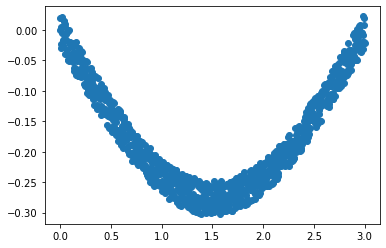

In [15]:
plt.scatter(x_mat[:, 5], y_mat[:, 5])
plt.show()

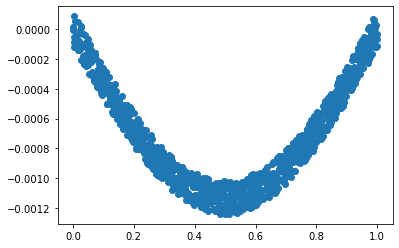

In [16]:
plt.scatter(x_mat[:, 80], y_mat[:, 80])
plt.show()

In [17]:
# Split the data
test_split = 0.1

n_test = int(0.1 * per_list.shape[0])  # number of l_q_E_I combinations for testing

x_mat_test = np.zeros([n, n_test])
x_mat_test = x_mat[:, (per_list.shape[0] - n_test):(per_list.shape[0])]

x_mat_train = np.delete(x_mat, np.s_[(per_list.shape[0] - n_test):(per_list.shape[0])], 1)

y_mat_test = np.zeros([n, n_test])
y_mat_test = y_mat[:, (per_list.shape[0] - n_test):(per_list.shape[0])]

y_mat_train = np.delete(y_mat, np.s_[(per_list.shape[0] - n_test):(per_list.shape[0])], 1)

In [18]:
print(x_mat_train.shape)
print(x_mat_test.shape)

(1000, 73)
(1000, 8)


In [19]:
print(y_mat_train.shape)
print(y_mat_test.shape)

(1000, 73)
(1000, 8)


In [20]:
np.save('81_x_vectors', x_mat)
np.save('81_y_vectors', y_mat)

np.save('x_mat_train', x_mat_train)
np.save('y_mat_train', y_mat_train)

np.save('x_mat_test', x_mat_test)
np.save('y_mat_test', y_mat_test)

In [21]:
# Maybe a better way to have the data
# Arranging the points in 3 dimensional np.arrays with shape [number_of_points_per_combination, number_of_x_y_combinations, 2]
xy_points_train = np.zeros([x_mat_train.shape[0], x_mat_train.shape[1],2])
for i in range(x_mat_train.shape[1]):
    for j in range(x_mat_train.shape[0]):
        xy_points_train[j, i, :] = [x_mat_train[j, i], y_mat_train[j, i]]
        
xy_points_test = np.zeros([x_mat_test.shape[0], x_mat_test.shape[1],2])
for i in range(x_mat_test.shape[1]):
    for j in range(x_mat_test.shape[0]):
        xy_points_test[j, i, :] = [x_mat_test[j, i], y_mat_test[j, i]]

In [22]:
print(xy_points_test[:,0,:])
print('\n')
print(xy_points_test[:,7,:])

[[ 0.00000000e+00  1.06989859e-05]
 [ 1.00100100e-03 -4.46613235e-05]
 [ 2.00200200e-03 -9.56618378e-06]
 ...
 [ 9.97997998e-01 -1.67935951e-05]
 [ 9.98998999e-01 -2.92119260e-05]
 [ 1.00000000e+00 -3.33817663e-05]]


[[ 0.00000000e+00 -1.05324606e-05]
 [ 1.00100100e-03  1.01983832e-05]
 [ 2.00200200e-03 -5.16733044e-05]
 ...
 [ 9.97997998e-01 -1.13662438e-04]
 [ 9.98998999e-01 -6.57577585e-05]
 [ 1.00000000e+00 -3.23072477e-05]]


In [23]:
np.save('xy_points_train', xy_points_train)

np.save('xy_points_test', xy_points_test)